# Text Preprocessing

---
Nama : Aris Dwi Wahyudi


---
Nim : A11.2020.13070


# Import Library

In [1]:
import json
import pandas as pd
import os
import numpy as np

In [2]:
# NLTK, library NLP di bahasa pemrograman python
import nltk

# Regex (re), library untuk mengenali dan memanipulasi pola text
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data JSON

In [4]:

# # Membaca file JSON
with open('dataset.json', 'r') as file:
    data = json.load(file)


In [5]:
# Menampilkan DataFrame
df = pd.DataFrame([data])
print(df)

                                                 url                 date  \
0  https://sport.detik.com/sepakbola/liga-spanyol...  2018-03-31 02:20:00   

                                title  \
0  Disindir Isco, Zidane Membela Diri   

                                             content  
0  Madrid - Isco seperti menyindir pelatihnya di ...  


In [6]:
df.head()

,url,date,title,content
0,https://sport.detik.com/sepakbola/liga-spanyol...,2018-03-31 02:20:00,"Disindir Isco, Zidane Membela Diri",Madrid - Isco seperti menyindir pelatihnya di ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      1 non-null      object
 1   date     1 non-null      object
 2   title    1 non-null      object
 3   content  1 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


# Membuat Text menjadi Lowercase

In [8]:

# Mengambil teks dari kolom content
text = df['content'].values[0]
text


'Madrid - Isco seperti menyindir pelatihnya di Real Madrid, Zinedine Zidane, setelah tampil gemilang di Timnas Spanyol. Zidane punya pembelaan untuk sindiran Isco ini. Isco menjadi bintang lapangan ketika Spanyol berhadapan dengan Argentina di laga persahabatan pada Selasa (27/3/2018). Gelandang berusia 25 tahun itu mengukir hat-trick untuk memenangkan La Furia Roja dengan skor telak 6-1. Seusai pertandingan tersebut, Isco mengaku bisa tampil oke di timnas karena merasa dipercaya oleh pelatih Julen Lopetegui, sementara di klub dia merasa belum mampu merebut hati Zidane sehingga lebih sering jadi cadangan belakangan ini. Mendengar hal tersebut, Zidane langsung berkomentar. Ia membantah kalau dianggap kurang percaya kepada Isco. "Saya merasa bukan sosok yang tidak adil. Saya pikir apa yang dia katakan bisa ditafsirkan bermacam-macam. Mungkin Isco punya peran yang berbeda di Spanyol dibandingkan di sini, tapi dia tetap penting. Saya selalu merasa dia penting untuk tim ini dan wajar saja s

# Menghilangkan karakter khusus pada teks

In [9]:
text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
text

'Madrid  Isco seperti menyindir pelatihnya di Real Madrid Zinedine Zidane setelah tampil gemilang di Timnas Spanyol Zidane punya pembelaan untuk sindiran Isco ini Isco menjadi bintang lapangan ketika Spanyol berhadapan dengan Argentina di laga persahabatan pada Selasa 2732018 Gelandang berusia 25 tahun itu mengukir hattrick untuk memenangkan La Furia Roja dengan skor telak 61 Seusai pertandingan tersebut Isco mengaku bisa tampil oke di timnas karena merasa dipercaya oleh pelatih Julen Lopetegui sementara di klub dia merasa belum mampu merebut hati Zidane sehingga lebih sering jadi cadangan belakangan ini Mendengar hal tersebut Zidane langsung berkomentar Ia membantah kalau dianggap kurang percaya kepada Isco Saya merasa bukan sosok yang tidak adil Saya pikir apa yang dia katakan bisa ditafsirkan bermacammacam Mungkin Isco punya peran yang berbeda di Spanyol dibandingkan di sini tapi dia tetap penting Saya selalu merasa dia penting untuk tim ini dan wajar saja seorang pemain ingin berma

# Mengubah teks menjadi token (Tokenization)

In [10]:
tokens = word_tokenize(text)
print(tokens)

['Madrid', 'Isco', 'seperti', 'menyindir', 'pelatihnya', 'di', 'Real', 'Madrid', 'Zinedine', 'Zidane', 'setelah', 'tampil', 'gemilang', 'di', 'Timnas', 'Spanyol', 'Zidane', 'punya', 'pembelaan', 'untuk', 'sindiran', 'Isco', 'ini', 'Isco', 'menjadi', 'bintang', 'lapangan', 'ketika', 'Spanyol', 'berhadapan', 'dengan', 'Argentina', 'di', 'laga', 'persahabatan', 'pada', 'Selasa', '2732018', 'Gelandang', 'berusia', '25', 'tahun', 'itu', 'mengukir', 'hattrick', 'untuk', 'memenangkan', 'La', 'Furia', 'Roja', 'dengan', 'skor', 'telak', '61', 'Seusai', 'pertandingan', 'tersebut', 'Isco', 'mengaku', 'bisa', 'tampil', 'oke', 'di', 'timnas', 'karena', 'merasa', 'dipercaya', 'oleh', 'pelatih', 'Julen', 'Lopetegui', 'sementara', 'di', 'klub', 'dia', 'merasa', 'belum', 'mampu', 'merebut', 'hati', 'Zidane', 'sehingga', 'lebih', 'sering', 'jadi', 'cadangan', 'belakangan', 'ini', 'Mendengar', 'hal', 'tersebut', 'Zidane', 'langsung', 'berkomentar', 'Ia', 'membantah', 'kalau', 'dianggap', 'kurang', 'perca

# Menghilangkan Stop Words dalam bahasa Indonesia

In [11]:
# Install library Sastrawi

!pip install Sastrawi

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopword_remover_factory = StopWordRemoverFactory()
stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()
ina_stopword = stopword_remover_factory.create_stop_word_remover()

print(stopword_remover_factory.get_stop_words())

['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

In [13]:
# Membuat kalimat baru dari token yang sudah dibuat sebagai parameter untuk dapat digunakan pada fungsi ina_stopword.remove()
text_from_token = ' '.join(tokens)
print(text_from_token)

text_from_token_no_stop_words = ina_stopword.remove(text_from_token)

# Mengubah kalimat yang sudah tidak terdapat stop words menjadi token lagi
token = word_tokenize(text_from_token_no_stop_words)
token

Madrid Isco seperti menyindir pelatihnya di Real Madrid Zinedine Zidane setelah tampil gemilang di Timnas Spanyol Zidane punya pembelaan untuk sindiran Isco ini Isco menjadi bintang lapangan ketika Spanyol berhadapan dengan Argentina di laga persahabatan pada Selasa 2732018 Gelandang berusia 25 tahun itu mengukir hattrick untuk memenangkan La Furia Roja dengan skor telak 61 Seusai pertandingan tersebut Isco mengaku bisa tampil oke di timnas karena merasa dipercaya oleh pelatih Julen Lopetegui sementara di klub dia merasa belum mampu merebut hati Zidane sehingga lebih sering jadi cadangan belakangan ini Mendengar hal tersebut Zidane langsung berkomentar Ia membantah kalau dianggap kurang percaya kepada Isco Saya merasa bukan sosok yang tidak adil Saya pikir apa yang dia katakan bisa ditafsirkan bermacammacam Mungkin Isco punya peran yang berbeda di Spanyol dibandingkan di sini tapi dia tetap penting Saya selalu merasa dia penting untuk tim ini dan wajar saja seorang pemain ingin bermain

['Madrid',
 'Isco',
 'menyindir',
 'pelatihnya',
 'Real',
 'Madrid',
 'Zinedine',
 'Zidane',
 'tampil',
 'gemilang',
 'Timnas',
 'Spanyol',
 'Zidane',
 'pembelaan',
 'sindiran',
 'Isco',
 'Isco',
 'bintang',
 'lapangan',
 'Spanyol',
 'berhadapan',
 'Argentina',
 'laga',
 'persahabatan',
 'Selasa',
 '2732018',
 'Gelandang',
 'berusia',
 '25',
 'tahun',
 'mengukir',
 'hattrick',
 'memenangkan',
 'La',
 'Furia',
 'Roja',
 'skor',
 'telak',
 '61',
 'Seusai',
 'pertandingan',
 'Isco',
 'mengaku',
 'tampil',
 'oke',
 'timnas',
 'dipercaya',
 'pelatih',
 'Julen',
 'Lopetegui',
 'klub',
 'merebut',
 'hati',
 'Zidane',
 'cadangan',
 'Mendengar',
 'Zidane',
 'berkomentar',
 'Ia',
 'membantah',
 'dianggap',
 'percaya',
 'Isco',
 'Saya',
 'sosok',
 'adil',
 'Saya',
 'pikir',
 'ditafsirkan',
 'bermacammacam',
 'Mungkin',
 'Isco',
 'peran',
 'berbeda',
 'Spanyol',
 'dibandingkan',
 'Saya',
 'tim',
 'wajar',
 'pemain',
 'bermain',
 'Zidane',
 'Soccerway',
 'Tapi',
 'tugas',
 'memilih',
 '11',
 'pemai

# Stemming untuk Bahasa Indonesia

In [14]:
stemmed_text = ina_stemmer.stem(text_from_token_no_stop_words)
stemmed_text

'madrid isco sindir latih real madrid zinedine zidane tampil gemilang timnas spanyol zidane bela sindir isco isco bintang lapang spanyol hadap argentina laga sahabat selasa 2732018 gelandang usia 25 tahun ukir hattrick menang la furia roja skor telak 61 usai tanding isco aku tampil oke timnas percaya latih julen lopetegui klub rebut hati zidane cadang dengar zidane komentar ia ban anggap percaya isco saya sosok adil saya pikir tafsir bermacammacam mungkin isco peran beda spanyol banding saya tim wajar main main zidane soccerway tapi tugas pilih 11 main dia main semua gantung interpretasi kecewa isco saya senang performa dia tampil impresif lawan argentina spanyol kesan saya isco main real madrid zidane isco salah main 100 persen keras saya pikir isco tapi 25 main 11 main saya senang isco zidane isco sergio ramos absen laga lawan las palmas sabtu 3132018 dua main alami cedera ringan mfimfi'

In [15]:
token_from_stemmed_text = word_tokenize(stemmed_text)
print(token_from_stemmed_text)

['madrid', 'isco', 'sindir', 'latih', 'real', 'madrid', 'zinedine', 'zidane', 'tampil', 'gemilang', 'timnas', 'spanyol', 'zidane', 'bela', 'sindir', 'isco', 'isco', 'bintang', 'lapang', 'spanyol', 'hadap', 'argentina', 'laga', 'sahabat', 'selasa', '2732018', 'gelandang', 'usia', '25', 'tahun', 'ukir', 'hattrick', 'menang', 'la', 'furia', 'roja', 'skor', 'telak', '61', 'usai', 'tanding', 'isco', 'aku', 'tampil', 'oke', 'timnas', 'percaya', 'latih', 'julen', 'lopetegui', 'klub', 'rebut', 'hati', 'zidane', 'cadang', 'dengar', 'zidane', 'komentar', 'ia', 'ban', 'anggap', 'percaya', 'isco', 'saya', 'sosok', 'adil', 'saya', 'pikir', 'tafsir', 'bermacammacam', 'mungkin', 'isco', 'peran', 'beda', 'spanyol', 'banding', 'saya', 'tim', 'wajar', 'main', 'main', 'zidane', 'soccerway', 'tapi', 'tugas', 'pilih', '11', 'main', 'dia', 'main', 'semua', 'gantung', 'interpretasi', 'kecewa', 'isco', 'saya', 'senang', 'performa', 'dia', 'tampil', 'impresif', 'lawan', 'argentina', 'spanyol', 'kesan', 'saya',

# Membuat Bag of Words dari teks Bahasa Indonesia

In [16]:
frekuensi_kata_ina = {}
for kata in token_from_stemmed_text:
  if kata not in frekuensi_kata_ina:
    frekuensi_kata_ina[kata] = 1
  else:
    frekuensi_kata_ina[kata] += 1

print(frekuensi_kata_ina)

{'madrid': 3, 'isco': 12, 'sindir': 2, 'latih': 2, 'real': 2, 'zinedine': 1, 'zidane': 7, 'tampil': 3, 'gemilang': 1, 'timnas': 2, 'spanyol': 4, 'bela': 1, 'bintang': 1, 'lapang': 1, 'hadap': 1, 'argentina': 2, 'laga': 2, 'sahabat': 1, 'selasa': 1, '2732018': 1, 'gelandang': 1, 'usia': 1, '25': 2, 'tahun': 1, 'ukir': 1, 'hattrick': 1, 'menang': 1, 'la': 1, 'furia': 1, 'roja': 1, 'skor': 1, 'telak': 1, '61': 1, 'usai': 1, 'tanding': 1, 'aku': 1, 'oke': 1, 'percaya': 2, 'julen': 1, 'lopetegui': 1, 'klub': 1, 'rebut': 1, 'hati': 1, 'cadang': 1, 'dengar': 1, 'komentar': 1, 'ia': 1, 'ban': 1, 'anggap': 1, 'saya': 7, 'sosok': 1, 'adil': 1, 'pikir': 2, 'tafsir': 1, 'bermacammacam': 1, 'mungkin': 1, 'peran': 1, 'beda': 1, 'banding': 1, 'tim': 1, 'wajar': 1, 'main': 9, 'soccerway': 1, 'tapi': 2, 'tugas': 1, 'pilih': 1, '11': 2, 'dia': 2, 'semua': 1, 'gantung': 1, 'interpretasi': 1, 'kecewa': 1, 'senang': 2, 'performa': 1, 'impresif': 1, 'lawan': 2, 'kesan': 1, 'salah': 1, '100': 1, 'persen': 1,

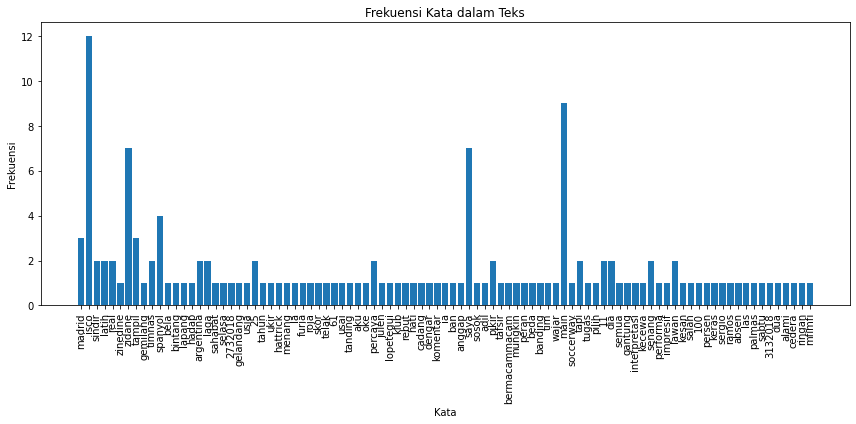

In [17]:
import matplotlib.pyplot as plt

# Data frekuensi kata
kata = list(frekuensi_kata_ina.keys())
frekuensi = list(frekuensi_kata_ina.values())

# Membuat plot
plt.figure(figsize=(12, 6))
plt.bar(kata, frekuensi)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekuensi Kata dalam Teks')
plt.xticks(rotation=90)  # Untuk memutar label kata agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()
